# 理想陷波滤波器

In [184]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from pyexcel_xls import get_data

In [185]:
def freqfilter_ideal_sink(M,N,u0,v0,D0):
    u = np.arange(-M//2,M//2).astype(np.int32)
    v = np.arange(-N//2,N//2).astype(np.int32)
    [U,V] = np.meshgrid(u,v)
    D = np.sqrt(U ** 2 + V ** 2)
    D1 = np.sqrt((U - u0) ** 2 + (V - v0) ** 2)
    D2 = np.sqrt((U + u0) ** 2 + (V + v0) ** 2)
    H = np.zeros_like(D)
    idx1 = (D1 <= D0)
    idx2 = (D2 <= D0)
    idx = idx1 | idx2
    H[~idx] = 1
    return H

In [186]:
dst = freqfilter_ideal_sink(512,512,3,50,40).astype(np.uint8)

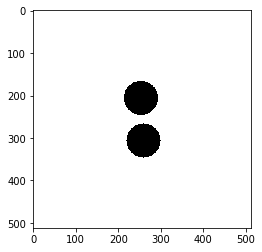

In [187]:
plt.imshow(dst,'gray')

In [188]:
def sink_filter(src,u0,v0,D0):
    rows,cols = src.shape[0],src.shape[1]
    src_float = src.astype(np.float32) / 255.0
    srcf = np.fft.fft2(src_float)
    srcf_shift = np.fft.fftshift(srcf)
    sf = freqfilter_ideal_sink(cols,rows,u0,v0,D0)
    dfimg = srcf_shift * sf
    dfimage_ifftshift = np.fft.ifftshift(dfimg)
    dimg = np.fft.ifft2(dfimage_ifftshift)
    return np.abs(np.real(dimg))

In [189]:
def noise_gaussian(M,N,a = 0,b=1):
    R = a + b * np.random.randn(M,N)
    return R

In [190]:
src = cv2.cvtColor(cv2.imread('../../datas/f3.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(src,cv2.COLOR_RGB2GRAY)

In [191]:
rows,cols = gray.shape

In [192]:
noise = noise_gaussian(rows,cols,b=0.1)
src_noise = np.zeros(src.shape,dtype=np.float64)
src_noise[:,:,0] = np.float64(src[:,:,0]) + noise * 255
src_noise[:,:,1] = np.float64(src[:,:,1]) + noise * 255
src_noise[:,:,2] = np.float64(src[:,:,2]) + noise * 255

src_noise[src_noise < 0] = 0
src_noise[src_noise > 255] = 255
src_noise = src_noise.astype(np.uint8)

In [211]:
dstr = sink_filter(src_noise[:,:,0],3,30,16)
dstg = sink_filter(src_noise[:,:,1],3,30,16)
dstb = sink_filter(src_noise[:,:,2],3,30,16)

In [212]:
dst = cv2.merge([dstr,dstg,dstb])

In [213]:
dst = dst * 255
dst[dst < 0] = 0
dst[dst > 255] = 255
dst = dst.astype(np.uint8)

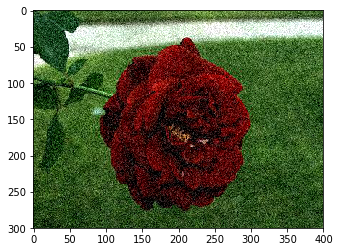

In [214]:
plt.imshow(src_noise)

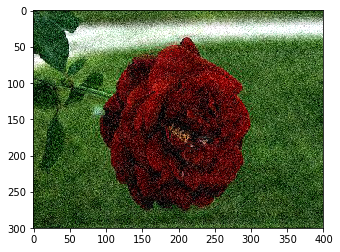

In [215]:
plt.imshow(dst)